### Kalman Filtering

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class KalmanFilter(object):
    def __init__(self, dt, u, std_acc, std_meas):
        self.dt = dt
        self.u = u
        self.std_acc = std_acc
        self.A = np.matrix([[1, self.dt],
                            [0, 1]])
        self.B = np.matrix([[(self.dt**2)/2], [self.dt]])
        self.H = np.matrix([[1, 0]])
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0], [0]])
    
    def predict(self):
        # Ref :Eq.(9) and Eq.(10)
        # Update time state
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)
        # Calculate error covariance
        # P= A*P*A' + Q
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):
        # Ref :Eq.(11) , Eq.(11) and Eq.(13)
        # S = H*P*H'+R
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        # Calculate the Kalman Gain
        # K = P * H'* inv(H*P*H'+R)
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  # Eq.(11)
        self.x = np.round(
        self.x + np.dot(K, (z - np.dot(self.H, self.x))))  # Eq.(12)
        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P  # Eq.(13)


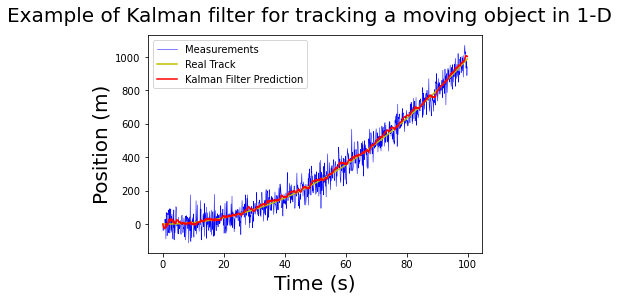

In [14]:
def main():
    dt = 0.1
    t = np.arange(0, 100, dt)
    # Define a model track
    real_track = 0.1*((t**2) - t)
    u = 2
    # we assume that the standard deviation of the acceleration is 0.25 (m/s^2)
    std_acc = 0.25
    std_meas = 1.2    # and standard deviation of the measurement is 1.2 (m)
    # create KalmanFilter object
    kf = KalmanFilter(dt, u, std_acc, std_meas)
    predictions = []
    measurements = []
    for x in real_track:
        # Mesurement
        z = kf.H * x + np.random.normal(0, 50)
        measurements.append(z.item(0))
        predictions.append(kf.predict()[0])
        kf.update(z.item(0))
    fig = plt.figure()
    fig.suptitle(
        'Example of Kalman filter for tracking a moving object in 1-D', fontsize=20)
    plt.plot(t, measurements, label='Measurements', color='b', linewidth=0.5)
    plt.plot(t, np.array(real_track), label='Real Track',
             color='y', linewidth=1.5)
    plt.plot(t, np.squeeze(predictions),
             label='Kalman Filter Prediction', color='r', linewidth=1.5)
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('Position (m)', fontsize=20)
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()